In [234]:
# Decision Tree to classify disease based on symptom 

In [235]:
import pandas as pd

In [236]:
# Read in data
data = pd.read_csv("/Users/naomi/Desktop/MSiA Spring Quarter 2019/AVC/ChatBot/data/dataset_uncleaned.csv") 
data.head(2)

Disease  Count of Disease Occurrence  \
0  UMLS:C0020538_hypertensive disease                       3363.0   
1                                 NaN                          NaN   

                             Symptom  
0           UMLS:C0008031_pain chest  
1  UMLS:C0392680_shortness of breath

In [237]:
import csv
from collections import defaultdict

disease_list = []

# Function to return the disease list
def return_list(disease):
    
    disease_list = []
    
    #print(disease)
    match = disease.replace('^','_').split('_')
    count = 1
    
    for name in match:
        
        # print(count)
        if count%2==0:
            disease_list.append(name)
        count = count + 1
   
    # print(disease_list)
    return disease_list  

with open("/Users/naomi/Desktop/MSiA Spring Quarter 2019/AVC/ChatBot/data/dataset_uncleaned.csv") as csvfile:
    reader = csv.reader(csvfile)
    disease_name=""
    disease_weight = 0
    disease_list = []
    dict_wt = {}
    #print(disease_list)
    #print(disease_dict)
    disease_dict = defaultdict(list)
    for row in reader:
        #print(row)
        if row[0]!="\xc2\xa0" and row[0]!="":
            disease_name = row[0]
            disease_weight = row[1]
            disease_list = return_list(disease_name)
            
        # Get list of symptoms
        if row[2]!="\xc2\xa0" and row[2]!="":
            symptom_list = return_list(row[2])
            # print(symptom_list)
            
            # Create a dictionary of lists with disease : [ list, of, symptoms], disease: [list, of, symptoms]
            for name in disease_list:
                for symptom in symptom_list:
                    disease_dict[name].append(symptom)
                dict_wt[name] = disease_weight
                
                
    #print(disease_list)
    #print(disease_dict)

In [238]:
# Write to new csv with cleaned and reformatted data 
with open("Clean_dataset.csv","w") as csvfile:  
    writer = csv.writer(csvfile)
    for key,values in disease_dict.items():
        for symptoms in values:
            writer.writerow([key,symptoms,dict_wt[key]])

In [239]:
# Reformat data into
columns = ['Disease','Symptom','Weight']
data = pd.read_csv("Clean_dataset.csv",names=columns,encoding="ISO-8859-1")
data.head(15)

Disease              Symptom  Weight
0   hypertensive disease           pain chest    3363
1   hypertensive disease  shortness of breath    3363
2   hypertensive disease            dizziness    3363
3   hypertensive disease             asthenia    3363
4   hypertensive disease                 fall    3363
5   hypertensive disease              syncope    3363
6   hypertensive disease              vertigo    3363
7   hypertensive disease                sweat    3363
8   hypertensive disease   sweating increased    3363
9   hypertensive disease          palpitation    3363
10  hypertensive disease               nausea    3363
11  hypertensive disease      angina pectoris    3363
12  hypertensive disease       pressure chest    3363
13              diabetes             polyuria    1421
14              diabetes           polydypsia    1421

In [240]:
# Exploratory Data Analysis

In [241]:
# Count of unique diseases = 149
data['Disease'].nunique()

149

In [242]:
# Count of unique symptoms = 404
data['Symptom'].nunique()

404

In [243]:
# Range of weights for disease frequency = 3321
range = data['Weight'].max() - data['Weight'].min()
range

3321

In [244]:
# max = 3363
data['Weight'].max() 

3363

In [245]:
# min = 42
data['Weight'].min()

42

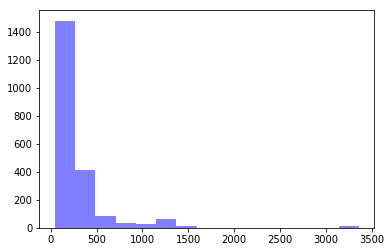

In [246]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
 
x = data['Weight']
num_bins = 15
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [247]:
# Load libraries for decision tree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


one_hot_data = pd.get_dummies(data[['Symptom','Weight', 'Disease']],drop_first=True)
one_hot_data['Disease'] = data['Disease']
one_hot_data.head(10)

Weight  Symptom_Murphy's sign  Symptom_Stahli's line  \
0    3363                      0                      0   
1    3363                      0                      0   
2    3363                      0                      0   
3    3363                      0                      0   
4    3363                      0                      0   
5    3363                      0                      0   
6    3363                      0                      0   
7    3363                      0                      0   
8    3363                      0                      0   
9    3363                      0                      0   

   Symptom_abdomen acute  Symptom_abdominal bloating  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   
5                      0                           0   
6                      0                           0   
7                      0                           0   
8                      0                           0   
9                      0                           0   

   Symptom_abdominal tenderness  Symptom_abnormal sensation  \
0                             0                           0   
1                             0                           0   
2                             0                           0   
3                             0                           0   
4                             0                           0   
5                             0                           0   
6                             0                           0   
7                             0                           0   
8                             0                           0   
9                             0                           0   

   Symptom_abnormally hard consistency  Symptom_abortion  \
0                                    0                 0   
1                                    0                 0   
2                                    0                 0   
3                                    0                 0   
4                                    0                 0   
5                                    0                 0   
6                                    0                 0   
7                                    0                 0   
8                                    0                 0   
9                                    0                 0   

   Symptom_abscess bacterial  ...  Disease_tachycardia sinus  \
0                          0  ...                          0   
1                          0  ...                          0   
2                          0  ...                          0   
3                          0  ...                          0   
4                          0  ...                          0   
5                          0  ...                          0   
6                          0  ...                          0   
7                          0  ...                          0   
8                          0  ...                          0   
9                          0  ...                          0   

   Disease_thrombocytopaenia  Disease_thrombus  Disease_tonic-clonic epilepsy  \
0                          0                 0                              0   
1                          0                 0                              0   
2                          0                 0                              0   
3                          0                 0                              0   
4                          0                 0                              0   
5                          0                 0                              0   
6                          0                 0                              0   
7                          0

In [248]:
one_hot_data.shape

(2129, 553)

In [249]:
# Drop duplicates
one_hot_data.drop_duplicates(keep='first',inplace=True)

In [250]:
one_hot_data.shape

(2116, 553)

In [251]:
# Get final list of columns from the df
feature_cols = one_hot_data.columns 
feature_cols = feature_cols[1:]
feature_cols

Index(['Symptom_Murphy's sign', 'Symptom_Stahli's line',
       'Symptom_abdomen acute', 'Symptom_abdominal bloating',
       'Symptom_abdominal tenderness', 'Symptom_abnormal sensation',
       'Symptom_abnormally hard consistency', 'Symptom_abortion',
       'Symptom_abscess bacterial', 'Symptom_absences finding',
       ...
       'Disease_tachycardia sinus', 'Disease_thrombocytopaenia',
       'Disease_thrombus', 'Disease_tonic-clonic epilepsy',
       'Disease_tonic-clonic seizures', 'Disease_transient ischemic attack',
       'Disease_tricuspid valve insufficiency', 'Disease_ulcer peptic',
       'Disease_upper respiratory infection', 'Disease'],
      dtype='object', length=552)

In [254]:
# Group by disease and reset index 
one_hot_data = one_hot_data.groupby('Disease').sum()
one_hot_data = one_hot_data.reset_index()
one_hot_data.head(5)

Disease  Weight  Symptom_Murphy's sign  \
0                   Alzheimer's disease    1717                      0   
1                                   HIV    5250                      0   
2      PneumocystisÂ cariniiÂ pneumonia    2034                      0   
3             accidentÂ cerebrovascular    7080                      0   
4  acquiredÂ immuno-deficiency syndrome    5250                      0   

   Symptom_Stahli's line  Symptom_abdomen acute  Symptom_abdominal bloating  \
0                      0                      0                           0   
1                      0                      0                           0   
2                      0                      0                           0   
3                      0                      0                           0   
4                      0                      0                           0   

   Symptom_abdominal tenderness  Symptom_abnormal sensation  \
0                             0                           0   
1                             0                           0   
2                             0                           0   
3                             0                           0   
4                             0                           0   

   Symptom_abnormally hard consistency  Symptom_abortion  ...  \
0                                    0                 0  ...   
1                                    0                 0  ...   
2                                    0                 0  ...   
3                                    0                 0  ...   
4                                    0                 0  ...   

   Disease_systemic infection  Disease_tachycardia sinus  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   Disease_thrombocytopaenia  Disease_thrombus  Disease_tonic-clonic epilepsy  \
0                          0                 0                              0   
1                          0                 0                              0   
2                          0                 0                              0   
3                          0                 0                              0   
4                          0                 0                              0   

   Disease_tonic-clonic seizures  Disease_transient ischemic attack  \
0                              0                                  0   
1                              0                                  0   
2                              0                                  0   
3                              0                                  0   
4                              0                                  0   

   Disease_tricuspid valve insufficiency  Disease_ulcer peptic  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     0   
4                                      0                     0   

   Disease_upper respiratory infection  
0                                    0  
1                                    0  
2                                    0  
3                                    0  
4                                    0  

[5 rows x 553 columns]

In [ ]:
# Create training and test set for CV

In [296]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus

In [255]:
feature_cols = feature_cols[:-1]
feature_cols


Index(['Symptom_Murphy's sign', 'Symptom_Stahli's line',
       'Symptom_abdomen acute', 'Symptom_abdominal bloating',
       'Symptom_abdominal tenderness', 'Symptom_abnormal sensation',
       'Symptom_abnormally hard consistency', 'Symptom_abortion',
       'Symptom_abscess bacterial', 'Symptom_absences finding',
       ...
       'Disease_systemic infection', 'Disease_tachycardia sinus',
       'Disease_thrombocytopaenia', 'Disease_thrombus',
       'Disease_tonic-clonic epilepsy', 'Disease_tonic-clonic seizures',
       'Disease_transient ischemic attack',
       'Disease_tricuspid valve insufficiency', 'Disease_ulcer peptic',
       'Disease_upper respiratory infection'],
      dtype='object', length=551)

In [258]:
x = one_hot_data[feature_cols]
y = one_hot_data['Disease']

In [272]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [283]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                         test_size=0.33, random_state=42)

In [288]:
print('The Decision Tree')
dt = DecisionTreeClassifier()
clf_dt = dt.fit(x,y)
print('Accuracy: ',clf_dt.score(x_test,y_test))

The Decision Tree
Accuracy:  1.0


In [294]:
clf_dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [311]:

tree.export_graphviz(dt.tree_, out_file='treepic.dot', feature_names=feature_cols)

TypeError: <sklearn.tree._tree.Tree object at 0x127559c60> is not an estimator instance.

In [337]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dot_data = tree.export_graphviz(clf_dt)
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
#Image(graph.create_png())
graph.write_pdf("/Users/naomi/Desktop/MSiA Spring Quarter 2019/AVC/ChatBot/models/decisionTree.pdf")


AttributeError: 'Dot' object has no attribute 'render'

In [338]:
# Create DOT data
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=feature_cols,  
                                class_names=y)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [158]:
#Feature importance

In [352]:
import numpy as np
import matplotlib.pyplot as plt

# Here in importance variable we are
# storing the importance of the features 
# which is basically the symptoms after
# the DecisionTreeClassifier classification
importances = dt.feature_importances_

# Now these importance are sorted
# in descending order by argsort()
# https://stackoverflow.com/questions/16486252/is-it-possible-to-use-argsort-in-descending-order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")


Feature ranking:


In [346]:
X_train.head(4)

Symptom  Weight
1935  cushingoidÂ habitus      68
408           hypesthesia     341
1969     feeling hopeless      67
22     sweating increased    1421

In [353]:
features = cols

In [371]:
export_graphviz(dt, 
                out_file='top5.dot', 
                feature_names=feature_cols,
                max_depth = 5
               )

import pydot

(graph,) = pydot.graph_from_dot_file('top5.dot')
graph.write_png('/Users/naomi/Desktop/MSiA Spring Quarter 2019/AVC/ChatBot/models/decisionTreeFeatures.png')



In [161]:
#Check length of training data after split
len(X_train.index)

1490

In [162]:
#Check length of testing data after split
len(X_test.index)

639

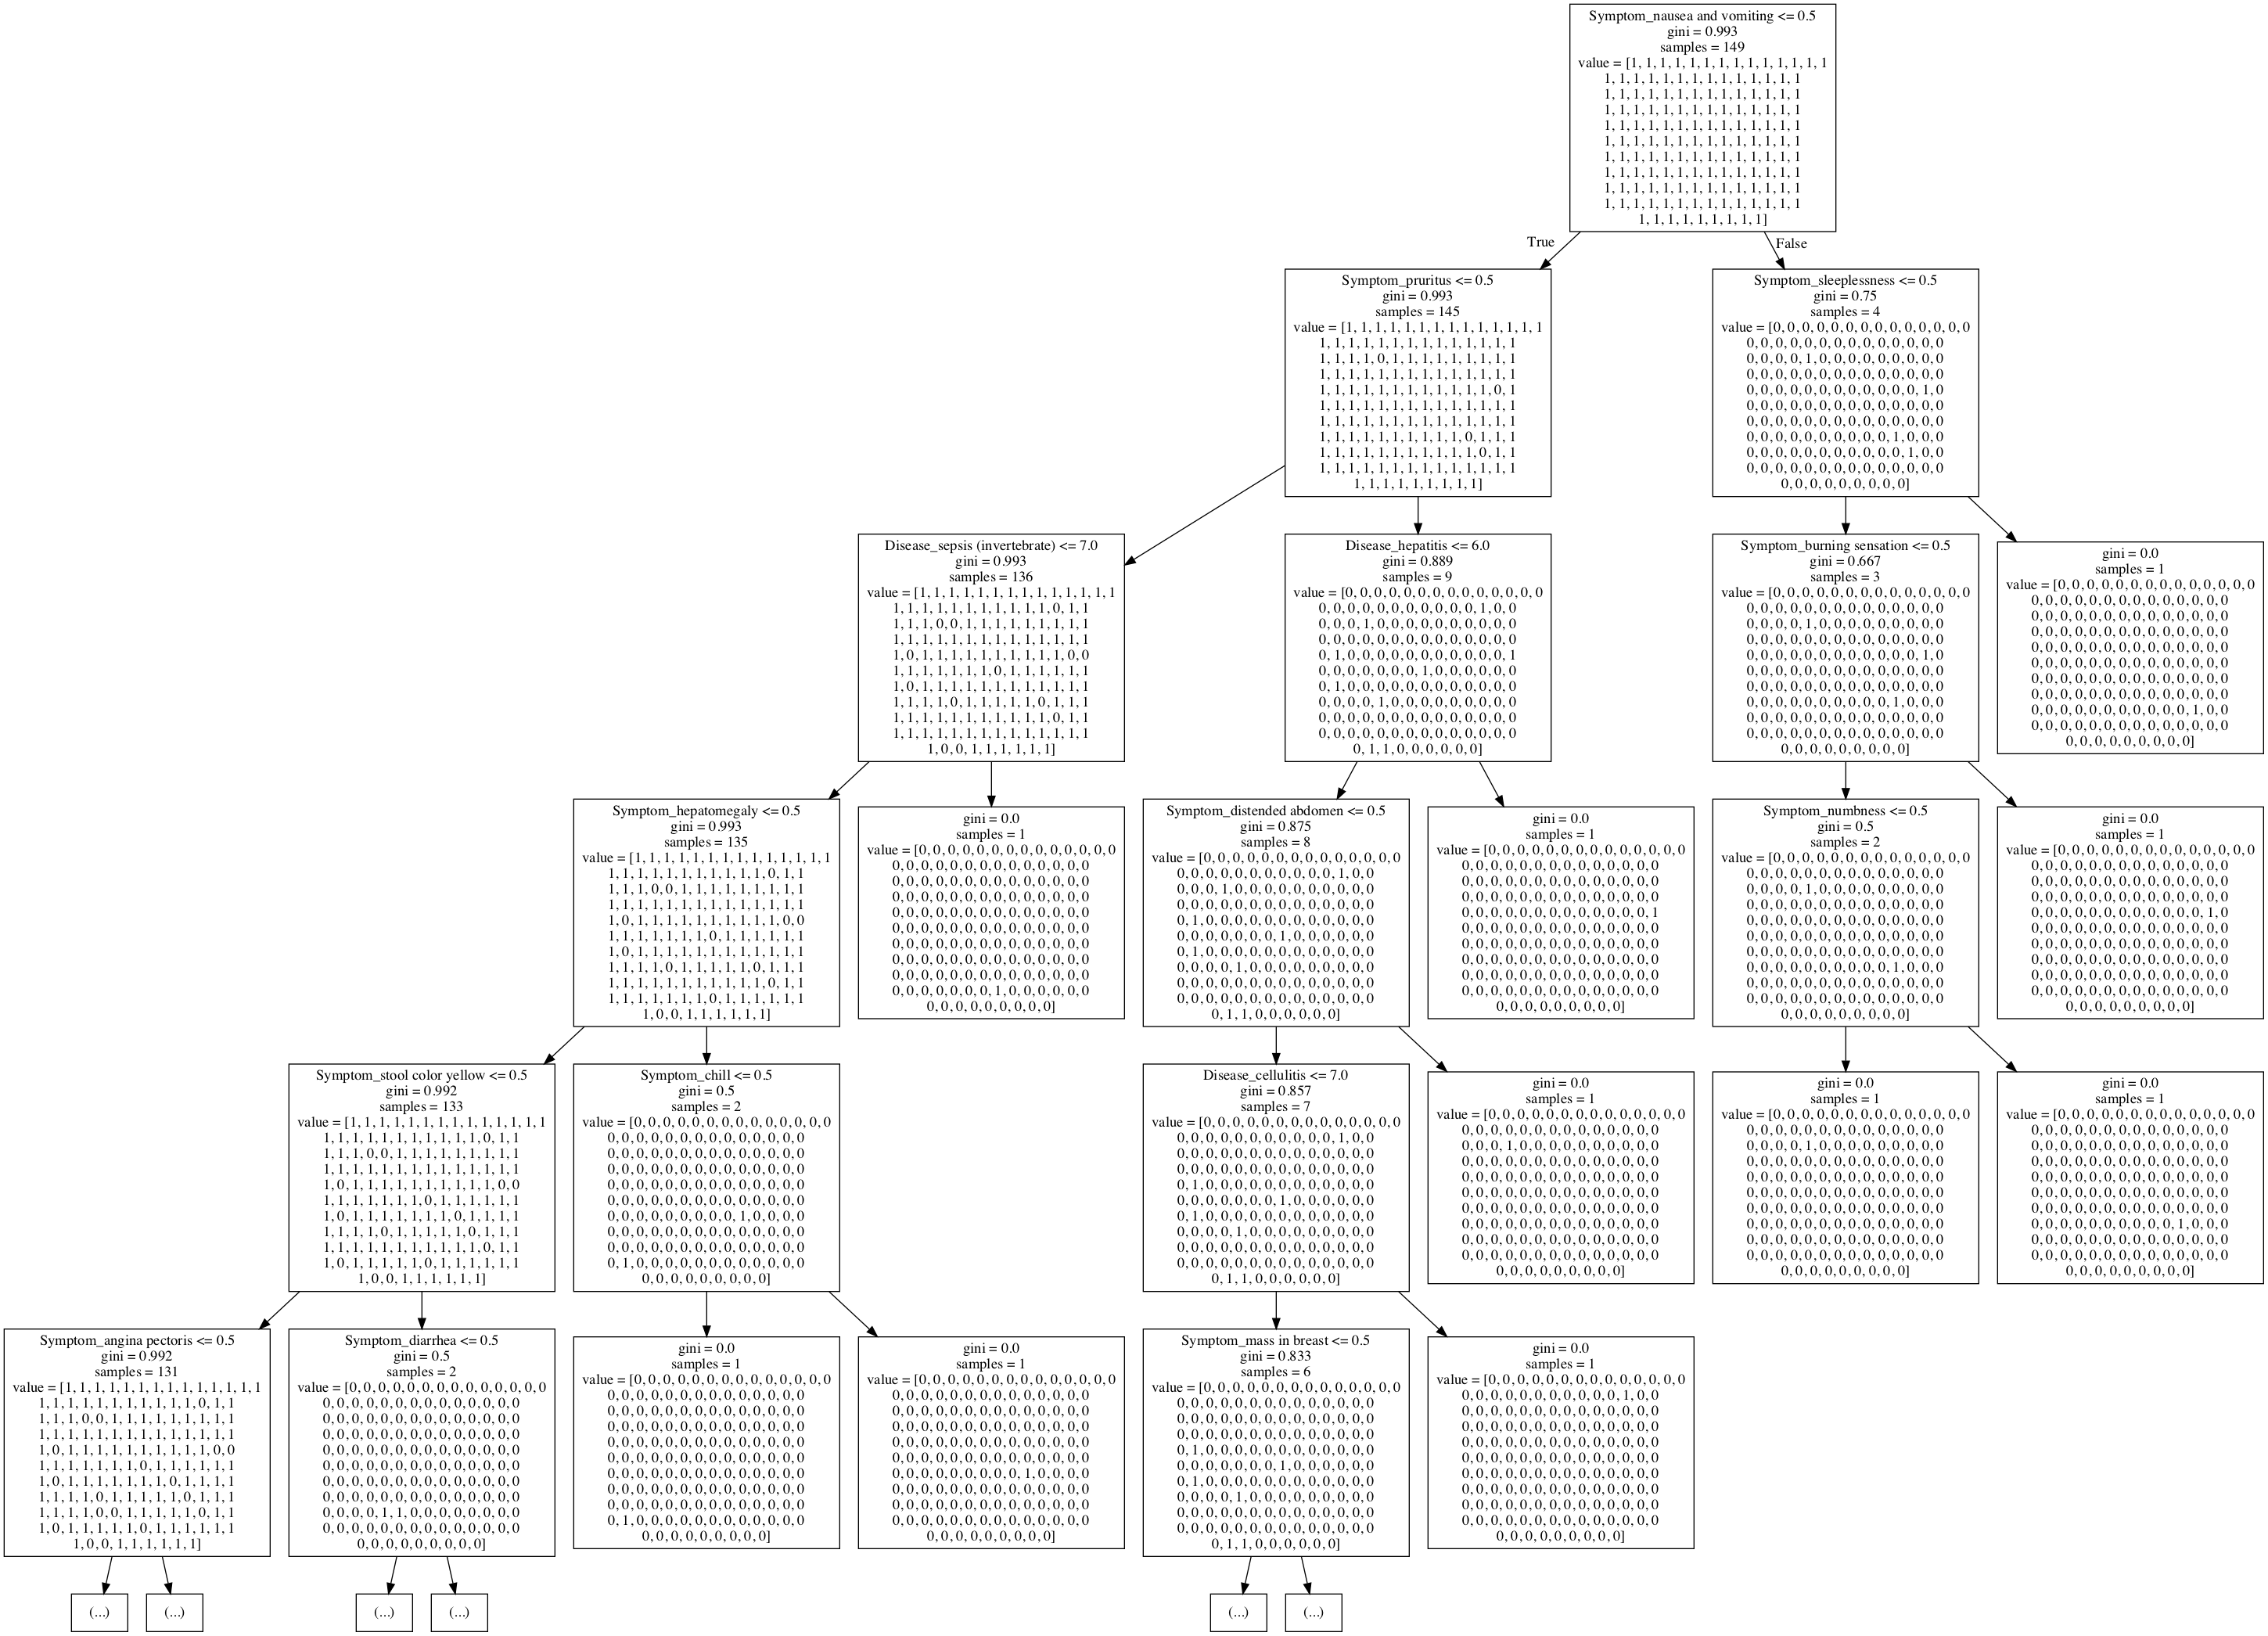

In [366]:
from IPython.display import Image
Image(filename='/Users/naomi/Desktop/MSiA Spring Quarter 2019/AVC/ChatBot/models/decisionTreeFeatures.png')

In [376]:
# Here we have done mapping for
# each symptom to the number
# basically index assigned to it
# and store it in feature_dictionary
feature_dictionary = {}
for i,f in enumerate(features):
    feature_dictionary[f] = i

In [379]:
feature_dictionary['Symptom_anosmia']

22

In [386]:
sample_x = [i/22 if i ==22 else i*0 for i in range(len(feature_dictionary))]

len(sample_x)

sample_x = np.array(sample_x).reshape(1,len(sample_x))
sampe_x

TypeError: 'numpy.int64' object is not callable

In [ ]:
dt.predict(sample_x)
dt.predict_proba(sample_x)